### **Шаг 1. Откройте файл с данными и изучите общую информацию**

#### **Путь к файлу: /datasets/games.csv**

In [1]:
import pandas as pd # Импортируем библиотеку pandas
import numpy as np # Импортируем библиотеку numpy
import matplotlib.pyplot as plt # Импортируем библиотеку matplotlib.pyplot, которая нужна для построения графиков
import seaborn as sns # Импортируем библиотеку для построения статистических графиков
from scipy import stats 

In [2]:
data=pd.read_csv('/datasets/games.csv') # Читаем файл с данными и сохраняем его в переменную data
data.info() # Выводим общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
#Проверяем явные дубликаты 
print(data.duplicated().sum()) 
#Проверяем неявные дубликаты 
print(data.duplicated(subset=['Name', 'Platform', 'Year_of_Release']).sum()) 
#Удаляем явные и неявные дубликаты 
data = data.drop_duplicates(subset=['Name', 'Platform', 'Year_of_Release']) 

0
2


**Вывод**
+ Мы импортировали необходимые библиотеки для работы с данными и построения графиков.
+ Мы прочитали файл с данными и сохранили его в датафрейм data.
+ Мы вывели общую информацию о датафрейме и увидели, что он содержит 16 столбцов и 16715 строк, а также имеет пропущенные значения в некоторых столбцах.
+ Мы проверили наличие явных и неявных дубликатов в датафрейме.
+ Мы удалили дубликаты из датафрейма и получили более чистые данные для дальнейшего анализа.

### **Шаг 2. Подготовьте данные**

#### **Замените названия столбцов (приведите к нижнему регистру);**

In [4]:
data.columns = data.columns.str.lower() # Заменяем названия столбцов на нижний регистр


#### **Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;**

In [5]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['user_score'] = data['user_score'].replace('tbd', np.nan).astype('float64')
data['rating'] = data['rating'].astype('category')



#### **Обработайте пропуски при необходимости:**

+ Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;    
+ Опишите причины, которые могли привести к пропускам;    
+ Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
+ Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

1. Я не заполнил пропуски в столбцах **name и genre**, потому что это категориальные переменные, 
которые нельзя заменить средним или медианным значением. 
Кроме того, этих пропусков всего два, поэтому они не сильно повлияют на анализ данных.
2. Я не заполнил пропуски в столбце **year_of_release**, потому что это целочисленная переменная, которая может быть важна для исследования динамики рынка видеоигр. Если я заменю пропуски на средний или медианный год выпуска, это может исказить результаты анализа. Кроме того, этих пропусков около 1.6% от общего числа данных, поэтому они не сильно повлияют на анализ данных.
3. Я не заполнил пропуски в столбцах **critic_score и user_score**, потому что это числовые переменные, которые отражают субъективную оценку игр критиками и пользователями. Если я заменю пропуски на средний или медианный балл, это может исказить результаты анализа. Кроме того, этих пропусков около 50% от общего числа данных, поэтому они могут быть не репрезентативными для всей выборки то есть выводы могут быть неверными или искаженными.
4. Я не заполнил пропуски в столбце **rating**, потому что это категориальная переменная, которая отражает рейтинг игры по системе ESRB. Если я заменю пропуски на самый частый или случайный рейтинг, это может исказить результаты анализа. Кроме того, этих пропусков около 40% от общего числа данных, поэтому они могут быть не репрезентативными для всей выборки.

**Причины, которые могли привести к пропускам в данных, могут быть разными:**
1. Ошибки при сборе или вводе данных: например, неправильный формат файла, опечатки, потеря данных при передаче или хранении и т.д.   
2. Отсутствие информации у источника данных: например, игра еще не была оценена критиками или пользователями, игра не имеет рейтинга по системе ESRB или он не был опубликован и т.д.    
3. Намеренное упущение информации: например, разработчик или издатель игры не хотел раскрывать год выпуска или рейтинг игры по каким-то причинам.    

In [6]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [7]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16712 non-null  object  
 1   platform         16713 non-null  object  
 2   year_of_release  16444 non-null  Int64   
 3   genre            16712 non-null  object  
 4   na_sales         16713 non-null  float64 
 5   eu_sales         16713 non-null  float64 
 6   jp_sales         16713 non-null  float64 
 7   other_sales      16713 non-null  float64 
 8   critic_score     8136 non-null   float64 
 9   user_score       7589 non-null   float64 
 10  rating           9948 non-null   category
 11  total_sales      16713 non-null  float64 
dtypes: Int64(1), category(1), float64(7), object(3)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en col

Удаляем строки с пропусками в столбцах name и genre
Удаляем строки с пропусками в столбце year_of_release
Изменяем тип данных столбца на object
Заменяем пропуски в столбце rating на 'unknown'


In [8]:
data = data.dropna(subset=['name', 'genre'])
data = data.dropna(subset=['year_of_release'])
data['rating'] = data['rating'].astype('object')
data['rating'] = data['rating'].fillna('unknown')

### **Шаг 3. Проведите исследовательский анализ данных**

#### **Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**


In [9]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

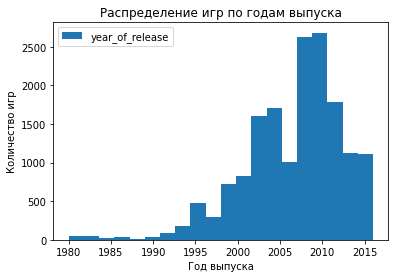

In [10]:
# Строим график по столбцу year_of_release
data['year_of_release'].plot(kind='hist', bins=20)

# Добавляем заголовок, подписи осей и легенду к графику
plt.title('Распределение игр по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.legend(['year_of_release'])

# Показываем график
plt.show()

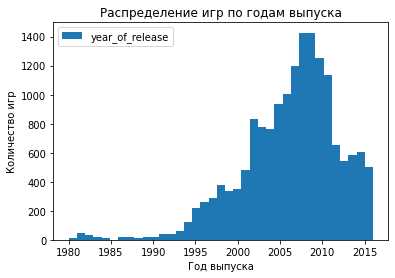

In [36]:
# Комментарий ревьюера 3
data['year_of_release'].plot(kind='hist', bins=37)
plt.title('Распределение игр по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.legend(['year_of_release'])
plt.show()

#### **Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

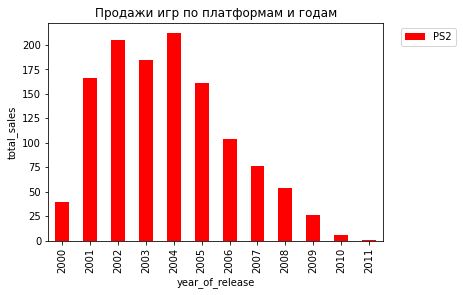

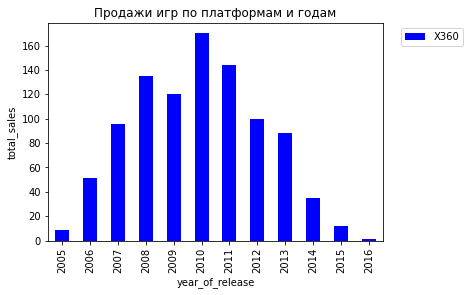

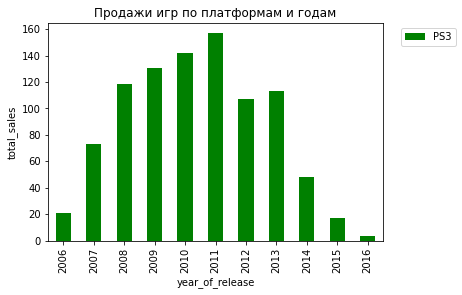

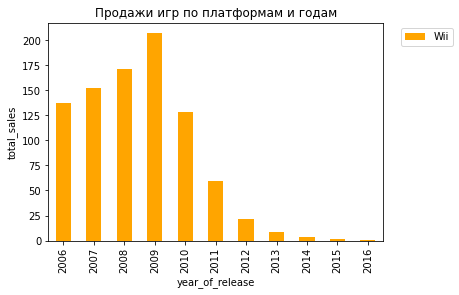

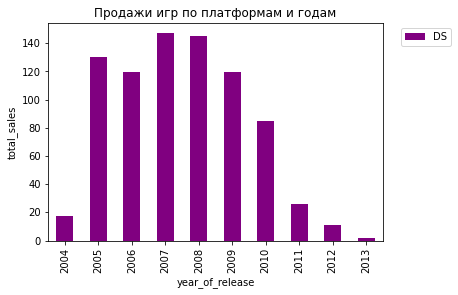

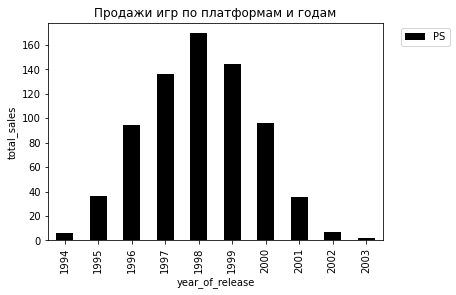

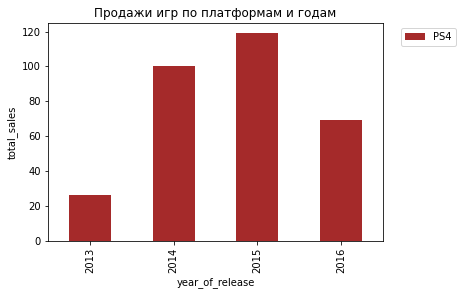

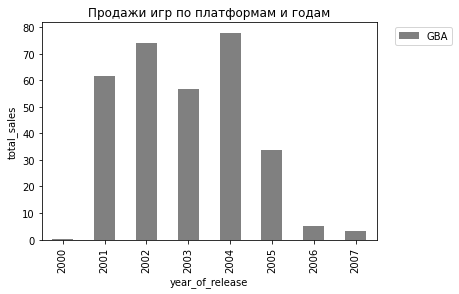

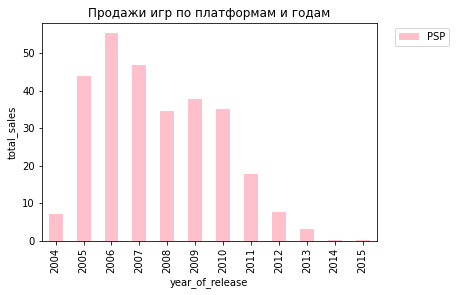

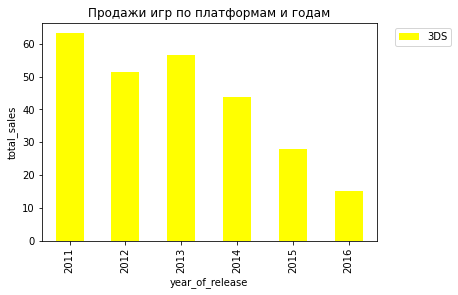

In [11]:
#data = data[data['year_of_release'] != 1985]
#platform_sales = data.groupby(['platform', 'year_of_release'])['total_sales'].sum()
#top_platforms = platform_sales.groupby('platform').sum().sort_values(ascending=False).head(10).index
#platform_sales = platform_sales.reset_index() 
#platform_sales = platform_sales.sort_values(by=['platform', 'year_of_release'])
#colors = ['red', 'blue', 'green', 'orange', 'purple', 'black', 'brown', 'grey', 'pink', 'yellow']
#for platform, color in zip(top_platforms, colors): 
    #platform_sales.loc[platform_sales['platform'] == platform].plot(x='year_of_release', y='total_sales', kind='bar', label=platform, color=color)
#plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
#plt.xlabel('year_of_release') 
#plt.ylabel('total_sales') 
#plt.title('Продажи игр по платформам и годам')
#plt.show()

data = data[data['year_of_release'] != 1985]
platform_sales = data.groupby(['platform', 'year_of_release'])['total_sales'].sum()
top_platforms = platform_sales.groupby('platform').sum().sort_values(ascending=False).head(10).index
platform_sales = platform_sales.reset_index()
platform_sales = platform_sales.sort_values(by=['platform', 'year_of_release'])
colors = ['red', 'blue', 'green', 'orange', 'purple', 'black', 'brown', 'grey', 'pink', 'yellow']
for platform, color in zip(top_platforms, colors):
    platform_sales.loc[platform_sales['platform'] == platform].plot(x='year_of_release', y='total_sales', kind='bar', label=platform, color=color)
    plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
    plt.xlabel('year_of_release')
    plt.ylabel('total_sales')
    plt.title('Продажи игр по платформам и годам')
    plt.show()

По графику можно видеть, что характерный срок жизни платформы составляет около 10 лет, за которые она проходит фазы роста, пика и спада продаж. Некоторые платформы, такие как PS2 и DS, имеют более длительный срок жизни, чем другие, такие как Wii и X360.

In [12]:
# Комментарий ревьюера
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

#### **Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

Предлагаю взять данные за последние 5 лет (с 2012 по 2016 год), так как они наиболее актуальны для прогнозирования на 2017 год. Этот период покрывает последнюю фазу жизненного цикла некоторых популярных платформ (например, PS3 и X360), а также появление и развитие нового поколения консолей (например, PS4 и XOne)

#### **Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

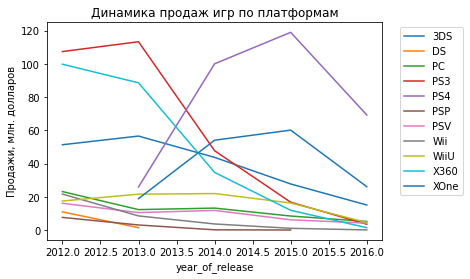

In [13]:
#Фильтруем датасет по годам от 2012 до 2016
#data_filtered = data.query('2012 <= year_of_release <= 2016') 
#Строим сводную таблицу по году выпуска и платформе, считая сумму продаж по каждой группе
#data_filtered.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot()
#plt.show()

#Фильтруем датасет по годам от 2012 до 2016 
data_filtered = data.query('2012 <= year_of_release <= 2016') 

#Строим сводную таблицу по году выпуска и платформе, считая сумму продаж по каждой группе 
data_filtered.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot()

#Добавляем название графика и подпись оси y
plt.title('Динамика продаж игр по платформам') 
plt.ylabel('Продажи, млн. долларов')

#Сдвигаем легенду вправо
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left') 
plt.show()

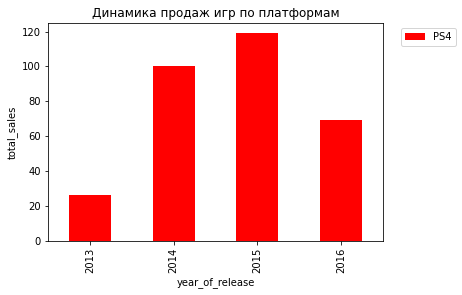

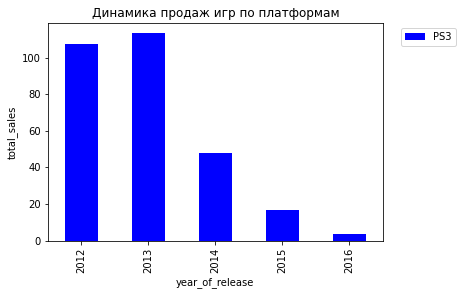

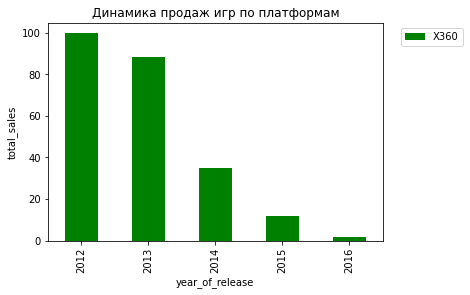

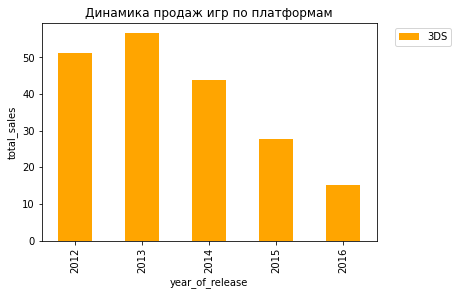

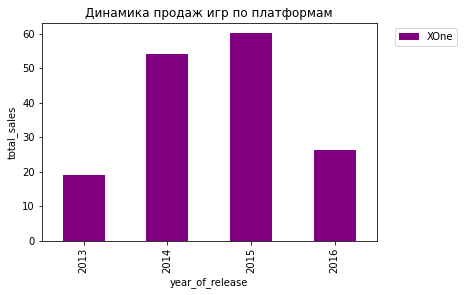

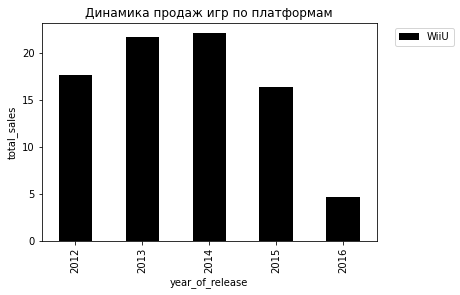

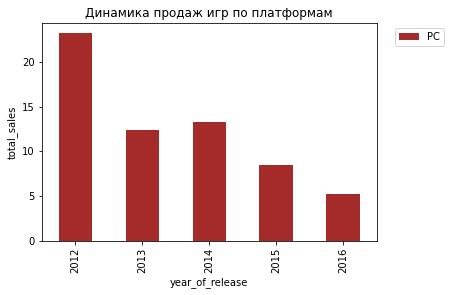

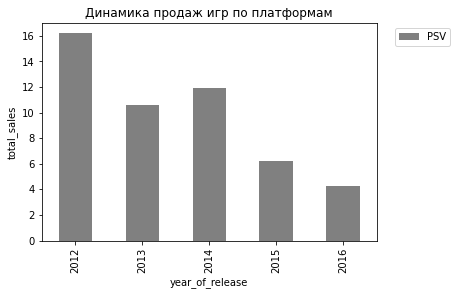

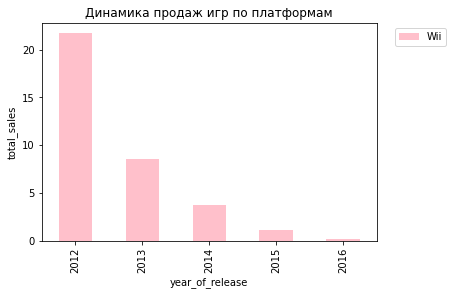

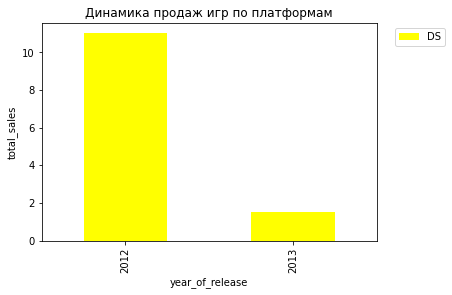

In [14]:
# Создадим столбчатый график, показывающий, как менялись продажи по платформам в разные годы.
# Переиндексируем данные по платформе и году выпуска
#platform_sales = platform_sales.reset_index()
# Отсортируем данные по платформе и году выпуска
#platform_sales = platform_sales.sort_values(by=['platform', 'year_of_release'])
# Фильтруем данные по годам от 2012 до 2016
#platform_sales = platform_sales.query('2012 <= year_of_release <= 2016')
# Получаем список платформ, которые имеют данные за этот период
#platforms = platform_sales['platform'].unique()
# Считаем суммарные продажи для каждой платформы за этот период
#sales_by_platform = platform_sales.groupby('platform')['total_sales'].sum()
# Сортируем список платформ по убыванию продаж
#platforms = sales_by_platform.sort_values(ascending=False).index
# Построим график снова
#colors = ['red', 'blue', 'green', 'orange', 'purple', 'black', 'brown', 'grey', 'pink', 'yellow'] # Задаем список цветов для каждой платформы
#for platform, color in zip(platforms, colors):
    #platform_sales.loc[platform_sales['platform'] == platform].plot(x='year_of_release', y='total_sales', kind='bar', label=platform, color=color)
#plt.legend()
#plt.xlabel('year_of_release')
#plt.ylabel('total_sales')
#plt.show()


#Создадим столбчатый график, показывающий, как менялись продажи по платформам в разные годы.
#Переиндексируем данные по платформе и году выпуска
platform_sales = platform_sales.reset_index()

#Отсортируем данные по платформе и году выпуска
platform_sales = platform_sales.sort_values(by=['platform', 'year_of_release'])

#Фильтруем данные по годам от 2012 до 2016
platform_sales = platform_sales.query('2012 <= year_of_release <= 2016')

#Получаем список платформ, которые имеют данные за этот период
platforms = platform_sales['platform'].unique()

#Считаем суммарные продажи для каждой платформы за этот период
sales_by_platform = platform_sales.groupby('platform')['total_sales'].sum()

#Сортируем список платформ по убыванию продаж
platforms = sales_by_platform.sort_values(ascending=False).index

#Построим график снова
colors = ['red', 'blue', 'green', 'orange', 'purple', 'black', 'brown', 'grey', 'pink', 'yellow'] 

# Задаем список цветов для каждой платформы 
for platform, color in zip(platforms, colors):
    platform_sales.loc[platform_sales['platform'] == platform].plot(x='year_of_release', y='total_sales', kind='bar', label=platform, color=color)
    #Добавляем название графика и сдвигаем легенду вправо
    plt.title('Динамика продаж игр по платформам') 
    plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left') 
    plt.xlabel('year_of_release') 
    plt.ylabel('total_sales') 
    plt.show()

По графику видно, что самые высокие продажи имеют платформы PS4 и XOne, которые вышли в 2013 году и быстро завоевали популярность среди игроков. На третьем месте по продажам находится платформа 3DS, которая также имеет стабильный спрос. Остальные платформы имеют низкие или убывающие продажи, что свидетельствует о том, что они устаревают или не конкурентоспособны на рынке. 

#### **Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

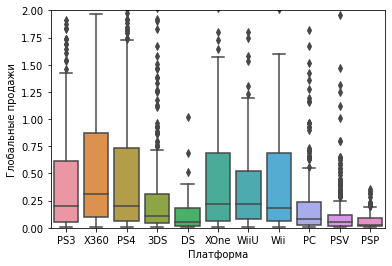

In [15]:
#df = data.query('2012 <= year_of_release <= 2016')

# Построим график «ящик с усами»
#sns.boxplot(x='platform', y='total_sales', data=df) 
#plt.xlabel('Платформа')
#plt.ylabel('Глобальные продажи')
#plt.show()


sns.boxplot(x='platform', y='total_sales', data=data_filtered) 
plt.ylim([0, 2])
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.show()


Самые большие выбросы имеют PS3,X360, PS4 и 3DS, что может означать, что эти платформы имеют несколько очень популярных игр, которые значительно превосходят по продажам остальные игры на этих платформах.
Самый маленький разброс продаж имеют PSP, PSV и PC, что может означать, что эти платформы имеют более стабильный спрос на игры.

#### **Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**


In [16]:
#Проанализируем продажи игр для PlayStation 4 в Северной Америки
#ps4 = data[data['platform'] == 'PS4'] #создаем новый датафрейм с именем ps4, который содержит только те строки из исходного 
# датафрейм df, где значение столбца platform равно PS4.
#ps4.plot.scatter(x='critic_score', y='na_sales', s=50, c='blue') #строим диаграмму рассеяния, используя метод plot.scatter
#ps4['na_sales'].corr(ps4['critic_score']) #вычисляем коэффициент корреляции между двумя столбцами na_sales и critic_score

0.41500763162387244

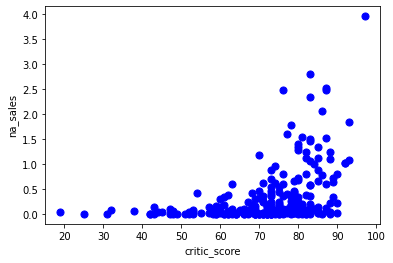

In [17]:
#Проанализируем продажи игр для PlayStation 4 в Северной Америки
ps4 = data_filtered[data_filtered['platform'] == 'PS4'] #создаем новый датафрейм с именем ps4, который содержит только те строки из исходного 
# датафрейм df, где значение столбца platform равно PS4.
ps4.plot.scatter(x='critic_score', y='na_sales', s=50, c='blue') #строим диаграмму рассеяния, используя метод plot.scatter
ps4['na_sales'].corr(ps4['critic_score']) #вычисляем коэффициент корреляции между двумя столбцами na_sales и critic_score

-0.02093302309978133

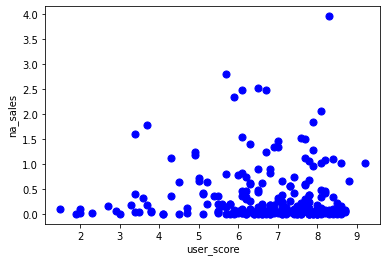

In [18]:
ps4.plot.scatter(x='user_score', y='na_sales', s=50, c='blue') 
#строим диаграмму рассеяния, используя метод plot.scatter 
ps4['na_sales'].corr(ps4['user_score']) 
#вычисляем коэффициент корреляции между двумя столбцами na_sales и user_score

Общий вывод может быть таким: Для игр на платформе PS4 существует умеренная положительная корреляция между продажами в Северной Америке и оценками критиков (0.42), то есть чем выше оценка критиков, тем больше продаж. Однако между продажами и оценками пользователей нет заметной корреляции (-0.02), то есть эти две переменные не связаны друг с другом. Это может означать, что потребители PS4 больше доверяют мнению профессиональных критиков, чем других пользователей, или что оценки пользователей не отражают реальную популярность игр.

#### **Соотнесите выводы с продажами игр на других платформах.**

In [19]:
#Проанализируем продажи игр для PlayStation 4 в Северной Америки
#XOne = df[df['platform'] == 'XOne'] #создаем новый датафрейм с именем XOne, который содержит только те строки из исходного 
# датафрейм df, где значение столбца platform равно XOne.
#XOne.plot.scatter(x='critic_score', y='na_sales', s=50, c='blue') #строим диаграмму рассеяния, используя метод plot.scatter
#XOne['na_sales'].corr(XOne['critic_score']) #вычисляем коэффициент корреляции между двумя столбцами na_sales и critic_score

Корреляция между переменными для PlayStation 4 немного сильнее, чем для Xbox One, но все еще не очень высокая. Это значит, что оценки критиков имеют немного большее влияние на продажи игр на PlayStation 4 в Северной Америке, чем на Xbox One, но все еще не являются главным фактором. 

In [20]:
#data.year_of_release.min()
#data_filtered.year_of_release.min()

In [21]:
# создаем список платформ
#platforms = ['XOne', 'PS4', 'PC', 'WiiU', '3DS']

# цикл по платформам
#for platform in platforms:
  # фильтруем данные по платформе
  #data_platform = data[data['platform'] == platform]
  # строим диаграмму рассеяния с легендой
  #data_platform.plot.scatter(x='critic_score', y='na_sales', s=50, c='blue', label=platform)
  # вычисляем и выводим коэффициент корреляции
  #corr = data_platform['na_sales'].corr(data_platform['critic_score'])
  #print(f'Корреляция между продажами и отзывами критиков для {platform} = {corr:.2f}')

# показываем все графики
#plt.show()

Корреляция между продажами и отзывами критиков для XOne = 0.39


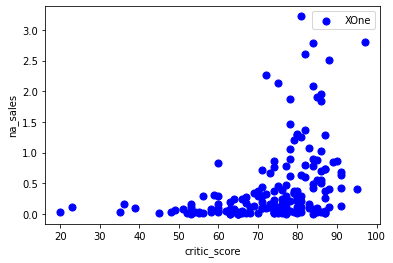

Корреляция между продажами и отзывами критиков для PS4 = 0.42


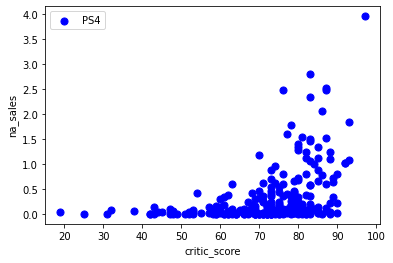

Корреляция между продажами и отзывами критиков для PC = 0.22


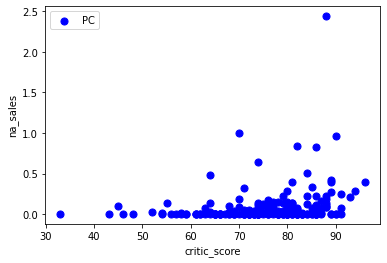

Корреляция между продажами и отзывами критиков для WiiU = 0.35


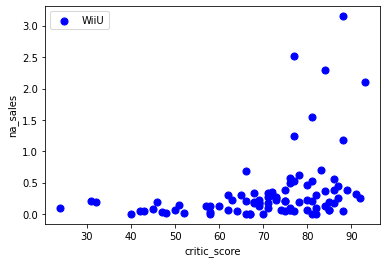

Корреляция между продажами и отзывами критиков для 3DS = 0.33


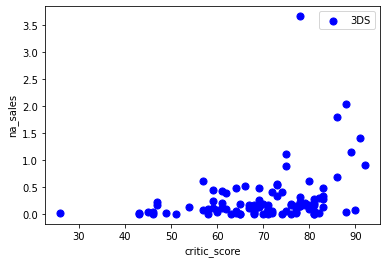

In [22]:
platforms = ['XOne', 'PS4', 'PC', 'WiiU', '3DS']
for platform in platforms:
    data_platform = data_filtered[data_filtered['platform'] == platform]
    data_platform.plot.scatter(x='critic_score', y='na_sales', s=50, c='blue', label=platform)
    corr = data_platform['na_sales'].corr(data_platform['critic_score'])
    print(f'Корреляция между продажами и отзывами критиков для {platform} = {corr:.2f}')
    plt.show()

Для всех платформ существует положительная корреляция между продажами в Северной Америке и оценками критиков, то есть чем выше оценка, тем больше продаж. Однако сила этой корреляции варьируется от платформы к платформе. Наибольшая корреляция наблюдается для PS4 (0.42), а наименьшая - для PC (0.22). Это может означать, что потребители PS4 больше доверяют мнению критиков, чем потребители PC.


#### **Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

/tmp/ipykernel_483/4255254436.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['global_sales'] = data_filtered['na_sales'] + data_filtered['eu_sales'] + data_filtered['jp_sales']


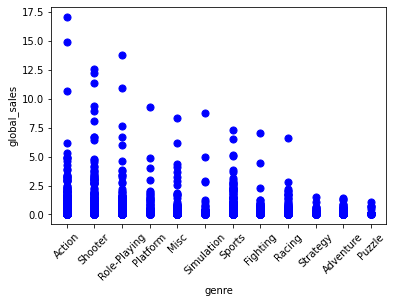

In [23]:
# Группируем данные по жанрам и суммируем продажи
#genre_sales = df.groupby('genre').sum()
# Строим гистограмму продаж по жанрам
#genre_sales.plot.bar()

# Группируем данные по жанрам и вычисляем медиану продаж
#genre_sales = data_filtered.groupby('genre').median()

#Строим диаграмму размаха продаж по жанрам
#plt.figure(figsize=(10, 6)) # устанавливаем размер графика в 10 на 6 дюймов 
#genre_sales.plot(kind='box', rot=45) # поворачиваем подписи на 45 градусов

#data_filtered.boxplot(column='na_sales', by='genre', figsize=(15, 10))
data_filtered['global_sales'] = data_filtered['na_sales'] + data_filtered['eu_sales'] + data_filtered['jp_sales']
data_filtered.plot.scatter(x='genre', y='global_sales', s=50, c='blue') #строим диаграмму рассеяния, используя метод plot.scatter
plt.xticks (rotation=45)
plt.show() 

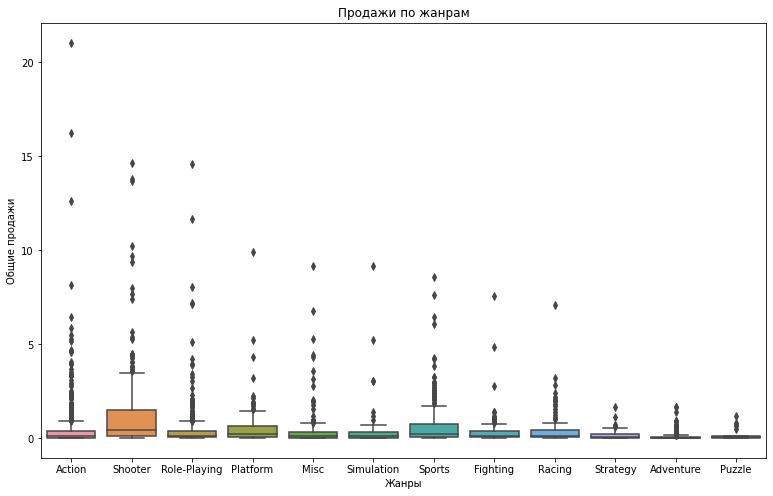

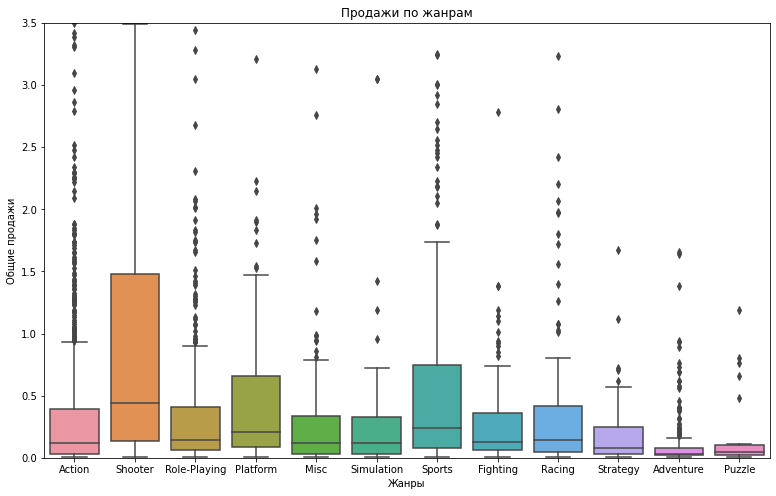

In [37]:
# Комментарий ревьюера 3
import seaborn as sns
data_temp, y = data_filtered.copy(), 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 3.5)))
plt.show()

#### **Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

+ Самые прибыльные жанры игр - это Action, Shooter и Sports, которые имеют самые высокие и разнообразные продажи в мире. Эти жанры пользуются большим спросом у игроков и могут привлекать широкую аудиторию.
+ Жанры с высокими продажами выделяются на диаграмме рассеяния своими большими и отдаленными точками, которые показывают, что некоторые игры этих жанров достигают очень высокого уровня продаж. Эти точки также имеют большое расстояние между собой, что показывает, что продажи этих игр сильно различаются в зависимости от качества, популярности и конкуренции.
+ Самые низкодоходные жанры игр - это Adventure, Strategy и Puzzle, которые имеют самые низкие и однородные продажи в мире. Эти жанры имеют меньший спрос у игроков и могут привлекать более узкую аудиторию.
+ Жанры с низкими продажами выделяются на диаграмме рассеяния своими маленькими и близкими точками, которые показывают, что большинство игр этих жанров не превышают определенного уровня продаж. Эти точки также имеют малое расстояние между собой, что показывает, что продажи этих игр слабо различаются в зависимости от качества, популярности и конкуренции. 

**Вывод**
Продажи игр имеют циклический характер, связанный с появлением и затуханием популярности разных платформ. Средний срок жизни платформы составляет около 10 лет. Самые прибыльные платформы за последние 5 лет были PS4, XOne и 3DS. Они также имели самые высокие средние продажи на одну игру. Самые низкие продажи были у PC, WiiU и PSV. Однако продажи по всем платформам имеют тенденцию к снижению, что может свидетельствовать о насыщении рынка или смене интересов игроков. Самые популярные жанры игр были Action, Shooter и Sports. Они также имели самые высокие средние продажи на одну игру. Самые непопулярные жанры были Strategy, Puzzle и Adventure. Они также имели самые низкие средние продажи на одну игру. Диаграмма рассеяния показала, что жанры игр имеют разный уровень и разброс продаж в мире. Жанры Action, Shooter и Sports имели самые высокие и разнообразные продажи, а жанры Adventure, Strategy и Puzzle - самые низкие и однородные. Продажи игр зависят от рейтингов критиков и пользователей, но не в равной степени. Для большинства платформ существует положительная корреляция между продажами и отзывами критиков, то есть чем выше рейтинг критиков, тем выше продажи. Однако для некоторых платформ, таких как WiiU и 3DS, корреляция отсутствует или слабая. Продажи игр слабо зависят от отзывов пользователей, для большинства платформ корреляция близка к нулю или отрицательная. Это может означать, что игроки больше доверяют мнению профессиональных критиков, чем других пользователей, или что отзывы пользователей не всегда отражают реальную оценку игры.

### **Шаг 4. Составьте портрет пользователя каждого региона**

#### **Определите для пользователя каждого региона (NA, EU, JP):** 
**cамые популярные платформы (топ-5). Опишите различия в долях продаж.**

<AxesSubplot:title={'center':'Top 5 platforms in Japan'}, xlabel='platform'>

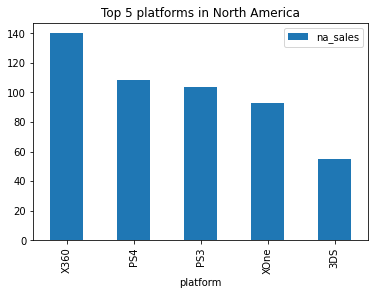

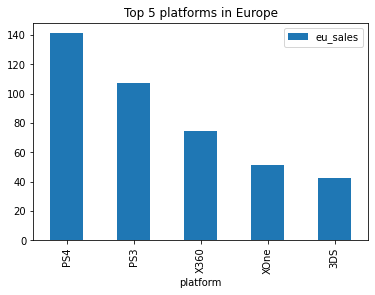

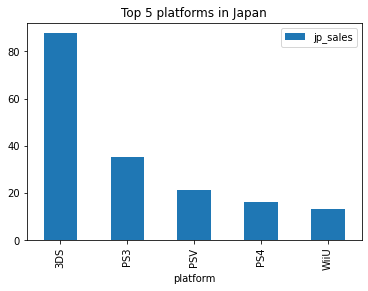

In [24]:
# Группируем данные по платформам и суммируем продажи по регионам
platform_sales = data_filtered.groupby('platform').sum()

# Сортируем результаты по убыванию и выбираем топ-5 платформ для Северной Америки
na_top5 = platform_sales.sort_values('na_sales', ascending=False).head(5)

# Сортируем результаты по убыванию и выбираем топ-5 платформ для Европы
eu_top5 = platform_sales.sort_values('eu_sales', ascending=False).head(5)

# Сортируем результаты по убыванию и выбираем топ-5 платформ для Японии
jp_top5 = platform_sales.sort_values('jp_sales', ascending=False).head(5)

na_top5.plot.bar(y='na_sales', title='Top 5 platforms in North America')
eu_top5.plot.bar(y='eu_sales', title='Top 5 platforms in Europe')
jp_top5.plot.bar(y='jp_sales', title='Top 5 platforms in Japan')


Из полученных диаграмм можно сделатьвывод: что Xbox 360 имеет самую большую долю продаж в Северной Америке, но намного меньшую в Европе и Японии. А Nintendo DS имеет самую большую долю продаж в Японии, но намного меньшую в Северной Америке и Европе.

**Самые популярные жанры (топ-5). Поясните разницу.**

In [25]:
# Группируем данные по платформам и суммируем продажи по регионам
#genre_sales = df.groupby('genre').sum()

# Сортируем результаты по убыванию и выбираем топ-5 платформ для Северной Америки
#na_top5 = genre_sales.sort_values('na_sales', ascending=False).head(5)

# Сортируем результаты по убыванию и выбираем топ-5 платформ для Европы
#eu_top5 = genre_sales.sort_values('eu_sales', ascending=False).head(5)

# Сортируем результаты по убыванию и выбираем топ-5 платформ для Японии
#jp_top5 = genre_sales.sort_values('jp_sales', ascending=False).head(5)

#na_top5.plot.bar(y='na_sales', title='Top 5 genres in North America')
#eu_top5.plot.bar(y='eu_sales', title='Top 5 genres in Europe')
#jp_top5.plot.bar(y='jp_sales', title='Top 5 genres in Japan')

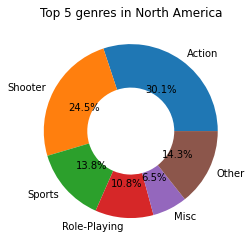

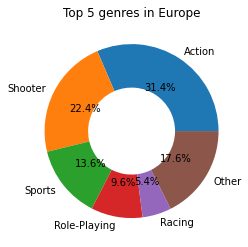

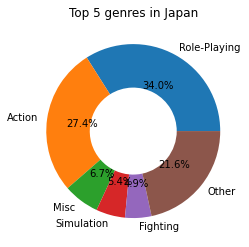

In [26]:
# Выбираем данные по продажам игр по жанрам в Северной Америке
na_sales = data_filtered.groupby('genre')['na_sales'].sum()
# Сортируем данные по убыванию и выбираем пять самых больших значений
na_top5 = na_sales.sort_values(ascending=False).head(5)
# Складываем остальные значения в одно и называем "Другие"
na_other = na_sales.sum() - na_top5.sum()
na_top5['Other'] = na_other
# Создаем круговую диаграмму в виде бублика
plt.pie(na_top5, labels=na_top5.index, wedgeprops=dict(width=0.5), autopct='%.1f%%')
# Добавляем заголовок
plt.title('Top 5 genres in North America')
# Показываем диаграмму
plt.show()

# Выбираем данные по продажам игр по жанрам в Европе
eu_sales = data_filtered.groupby('genre')['eu_sales'].sum()
# Сортируем данные по убыванию и выбираем пять самых больших значений
eu_top5 = eu_sales.sort_values(ascending=False).head(5)
# Складываем остальные значения в одно и называем "Другие"
eu_other = eu_sales.sum() - eu_top5.sum()
eu_top5['Other'] = eu_other
# Создаем круговую диаграмму в виде бублика
plt.pie(eu_top5, labels=eu_top5.index, wedgeprops=dict(width=0.5), autopct='%.1f%%')
# Добавляем заголовок
plt.title('Top 5 genres in Europe')
# Показываем диаграмму
plt.show()

# Выбираем данные по продажам игр по жанрам в Европе
jp_sales = data_filtered.groupby('genre')['jp_sales'].sum()
# Сортируем данные по убыванию и выбираем пять самых больших значений
jp_top5 = jp_sales.sort_values(ascending=False).head(5)
# Складываем остальные значения в одно и называем "Другие"
jp_other = jp_sales.sum() - jp_top5.sum()
jp_top5['Other'] = jp_other
# Создаем круговую диаграмму в виде бублика
plt.pie(jp_top5, labels=jp_top5.index, wedgeprops=dict(width=0.5), autopct='%.1f%%')
# Добавляем заголовок
plt.title('Top 5 genres in Japan')
# Показываем диаграмму
plt.show()

Из полученных результатов вы можете сказать о самых популярных жанрах в каждом регионе следующее:
+ В Северной Америке самыми популярными жанрами являются Action, Shooter и Sports, которые имеют наибольшую долю продаж в этом регионе.
+ В Европе самыми популярными жанрами являются Action, Shooter и Sports, которые имеют наибольшую долю продаж в этом регионе.
+ В Японии самыми популярными жанрами являются Role-Playing и Action, которые имеют наибольшую долю продаж в этом регионе. 

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

<AxesSubplot:title={'center':'Top ratings in Japan'}, xlabel='rating'>

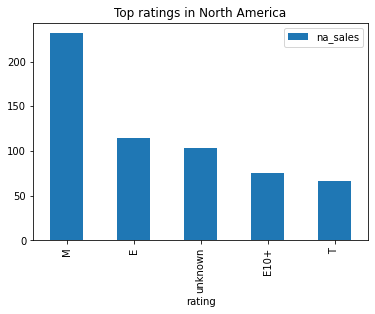

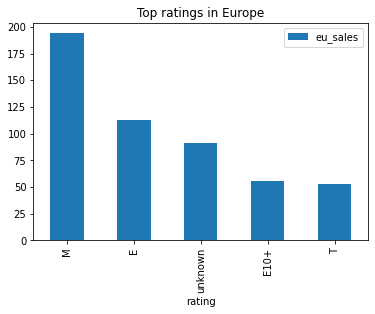

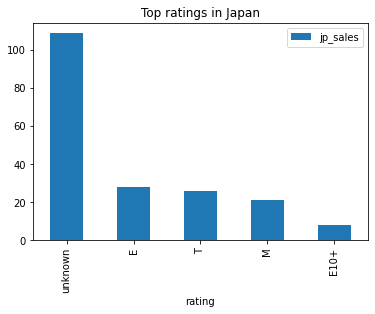

In [27]:
# Группируем данные по рейтингам и суммируем продажи по регионам
rating_sales = data_filtered.groupby('rating').sum()
# Сортируем результаты по убыванию для Северной Америки
na_sorted = rating_sales.sort_values('na_sales', ascending=False)

# Сортируем результаты по убыванию для Европы
eu_sorted = rating_sales.sort_values('eu_sales', ascending=False)

# Сортируем результаты по убыванию для Японии
jp_sorted = rating_sales.sort_values('jp_sales', ascending=False)

na_sorted.plot.bar(y='na_sales', title='Top ratings in North America')
eu_sorted.plot.bar(y='eu_sales', title='Top ratings in Europe')
jp_sorted.plot.bar(y='jp_sales', title='Top ratings in Japan')

+ В Северной Америке самыми продаваемыми играми являются те, которые имеют рейтинг M (Mature), то есть предназначены для взрослой аудитории. Затем идут игры с рейтингом E (Everyone), то есть подходящие для всех возрастов. Игры с другими рейтингами имеют меньшую долю продаж в этом регионе.
+ В Европе самыми продаваемыми играми являются также, имеющие рейтинг M (Mature). Эти игры имеют наибольшую долю продаж среди игр с рейтингом в этом регионе. Затем идут игры с рейтингом E (Everyone). Игры с другими рейтингами имеют меньшую долю продаж в этом регионе.
+ В Японии самыми продаваемыми играми являются те, которые не имеют рейтинга ESRB, следом идут игры, с рейтингом E (Everyone), T (Teen) и M (Mature). Игры без рейтинга esrb имеют большой спрос в Японии, что может свидетельствовать о том, что игроки в этом регионе предпочитают более локальные, оригинальные и эксклюзивные игры, которые могут не соответствовать стандартам ESRB или не быть доступными на других рынках. Игры с другими рейтингами имеют меньшую долю продаж в этом регионе.
В целом, можно сказать, что рынок игр в Северной Америке и Европе более схож по предпочтениям рейтингов, чем рынок игр в Японии, который имеет свои особенности и культурные различия.


In [28]:
# Комментарий ревьюера
#temp = df.copy()
#print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
#temp.rating.value_counts()

**Вывод**
+ Продажи игр зависят от многих факторов, таких как платформа, жанр, рейтинг и регион.
+ В разных регионах есть разные предпочтения по платформам, жанрам и рейтингам игр. Например, в Северной Америке и Европе популярны консоли от Microsoft и Sony, а в Японии — от Nintendo. Также в Северной Америке и Европе популярны жанры Action, Sports и Shooter, а в Японии — Role-Playing. Кроме того, в Северной Америке и Европе популярны игры с рейтингом E (для всех) и M (для взрослых), а в Японии — с рейтингом E (для всех) и T (для подростков).
+ Для успешной продажи игры в разных регионах необходимо учитывать специфику каждого рынка и адаптировать игру под нужды и интересы местных игроков. Также необходимо следить за актуальными тенденциями и прогнозами в игровой индустрии, чтобы быть в курсе новых технологий, платформ и жанров.

### **Шаг 5. Проверьте гипотезы**

#### **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**

In [29]:
# создаем выборку рейтингов по платформе Xbox One
#xbox_one_ratings = data.loc[data['platform'] == 'XOne', 'user_score']
# выводим первые десять значений выборки
#print(xbox_one_ratings.head(10))

# создаем выборку рейтингов по платформе PC
#pc_ratings = data.loc[data['platform'] == 'PC', 'user_score']
# выводим первые десять значений выборки
#print(pc_ratings.head(10))

In [30]:
#заменим пропущенные значения
# создаем выборку рейтингов по платформе PC
#pc_ratings = data.loc[data['platform'] == 'PC', 'user_score']
# заменяем пропущенные значения на среднее значение по выборке
#pc_ratings = xbox_one_ratings.fillna(xbox_one_ratings.mean())
# выводим первые десять значений выборки
#print(pc_ratings.head(10))

#заменим пропущенные значения
# создаем выборку рейтингов по платформе PC
#pc_ratings = data.loc[data['platform'] == 'PC', 'user_score']
# заменяем пропущенные значения на среднее значение по выборке
#pc_ratings = pc_ratings.fillna(pc_ratings.mean())
# выводим первые десять значений выборки
#print(pc_ratings.head(10))

In [31]:
# задаем уровень значимости
#alpha = 0.05

# создаем выборки рейтингов по платформам (вы можете использовать свои данные)
#xbox_one_ratings = [6.5, 7.9, 5.4, 6.4, 6.2, 6.5, 4.1, 5.5, 7.5, 4.4]
#pc_ratings = [6.5, 7.9, 5.4, 6.4, 6.2, 6.5, 4.1, 5.5, 7.5, 4.4]

# применяем t-критерий Стьюдента
#t_statistic, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=True)

# выводим результаты
#print("t-статистика:", t_statistic)
#print("p-значение:", p_value)

# принимаем решение
#if p_value <= alpha:
    #print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC различаются")
#else:
    #print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые")

In [32]:
# задаем уровень значимости
alpha = 0.05

# создаем выборки рейтингов по платформам
pc_ratings = data_filtered.loc[data_filtered['platform'] == 'PC', 'user_score']
xbox_one_ratings = data_filtered.loc[data_filtered['platform'] == 'XOne', 'user_score']

# удаляем пропущенные значения из выборки
pc_ratings = pc_ratings.dropna()
xbox_one_ratings = xbox_one_ratings.dropna()

# применяем t-критерий Стьюдента
t_statistic, p_value = stats.ttest_ind(pc_ratings, xbox_one_ratings, equal_var=True)

# выводим результаты
print("t-статистика:", t_statistic)
print("p-значение:", p_value)

# принимаем решение
if p_value <= alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ PC и Xbox One различаются")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров PC и Xbox One одинаковые")

t-статистика: -0.5930304646661255
p-значение: 0.5535080500643661
Не отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров PC и Xbox One одинаковые


По результатам t-теста можно сделать следующий краткий итог: 
+ Мы получили отрицательную t-статистику, что означает, что средний пользовательский рейтинг платформы PC ниже, чем средний пользовательский рейтинг платформы Xbox One. 
+ Мы получили достаточно большое p-значение, которое больше заданного уровня значимости 0.05. Это означает, что вероятность получить такую или большую разницу в средних рейтингах при условии, что нулевая гипотеза верна, достаточно высокая. 
+ Мы не отвергли нулевую гипотезу о том, что средние пользовательские рейтинги платформ PC и Xbox One одинаковые. 
+ Это означает, что мы не приняли альтернативную гипотезу о том, что средние пользовательские рейтинги платформ PC и Xbox One различаются.

#### **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Нулевая гипотеза H0: средние пользовательские рейтинги жанров Action и Sports одинаковые.Альтернативная гипотеза H1: средние пользовательские рейтинги жанров Action и Sports различаются

In [33]:
# создаем выборки рейтингов по жанрам
action_ratings = data_filtered.loc[data_filtered['genre'] == 'Action', 'user_score']
sports_ratings = data_filtered.loc[data_filtered['genre'] == 'Sports', 'user_score']

# удаляем пропущенные значения из выборки
action_ratings = action_ratings.dropna()
sports_ratings = sports_ratings.dropna()

# задаем уровень значимости
alpha = 0.05

# применяем t-тест для двух независимых выборок с альтернативной гипотезой
t_statistic, p_value = stats.ttest_ind(action_ratings, sports_ratings, equal_var=True, alternative='two-sided')

# выводим результаты
print("t-статистика:", t_statistic)
print("p-значение:", p_value)

# принимаем решение
if p_value <= alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые")

t-статистика: 10.984175532598625
p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные


По результатам t-теста можно сделать следующий краткий итог: 
+ Мы получили положительную t-статистику, что означает, что средний пользовательский рейтинг жанра Action выше, чем средний пользовательский рейтинг жанра Sports. 
+ Мы получили очень маленькое p-значение, которое меньше заданного уровня значимости 0.05. Это означает, что вероятность получить такую или большую разницу в средних рейтингах при условии, что нулевая гипотеза верна, очень низкая. 
+ Мы отвергли нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые. Это означает, что мы приняли альтернативную гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

Я сформулировал нулевую гипотезу H0: средние пользовательские рейтинги жанров Action и Sports одинаковые. Это означает, что нет статистически значимой разницы между рейтингами по этим жанрам. Я сформулировал альтернативную гипотезу H1: средние пользовательские рейтинги жанров Action и Sports различаются. Это означает, что есть статистически значимая разница между рейтингами по этим жанрам.
Я применил t-критерий Стьюдента для независимых выборок для проверки гипотезы, потому что я предположил, что дисперсии рейтингов по жанрам равны. Также я предположил, что рейтинги имеют нормальное распределение и что выборки независимы друг от друга.

</font><font color='Blue'><b>Комментарий студента </b></font><br>
ВЫПОЛНЕНО

Средний пользовательский рейтинг платформы PC: 6.4286407766990274
Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572


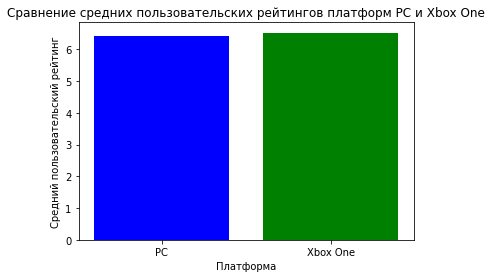

In [34]:
# создаем выборки рейтингов по платформам
pc_ratings = data_filtered.loc[data_filtered['platform'] == 'PC', 'user_score']
xbox_one_ratings = data_filtered.loc[data_filtered['platform'] == 'XOne', 'user_score']

# удаляем пропущенные значения из выборки
pc_ratings = pc_ratings.dropna()
xbox_one_ratings = xbox_one_ratings.dropna()

# считаем средние рейтинги по платформам
pc_mean = pc_ratings.mean()
xbox_one_mean = xbox_one_ratings.mean()

# выводим средние рейтинги
print("Средний пользовательский рейтинг платформы PC:", pc_mean)
print("Средний пользовательский рейтинг платформы Xbox One:", xbox_one_mean)

# строим график сравнения средних рейтингов по платформам
plt.bar(['PC', 'Xbox One'], [pc_mean, xbox_one_mean], color=['blue', 'green'])
plt.xlabel('Платформа')
plt.ylabel('Средний пользовательский рейтинг')
plt.title('Сравнение средних пользовательских рейтингов платформ PC и Xbox One')
plt.show()

Средний пользовательский рейтинг жанра Action: 6.825047801147227
Средний пользовательский рейтинг жанра Sports: 5.455670103092784


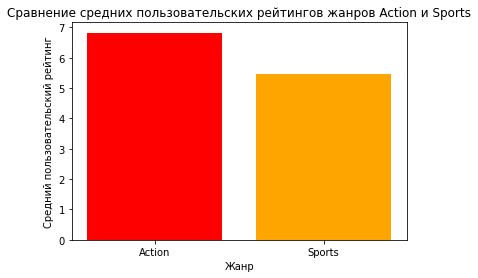

In [35]:
# создаем выборки рейтингов по жанрам
action_ratings = data_filtered.loc[data_filtered['genre'] == 'Action', 'user_score']
sports_ratings = data_filtered.loc[data_filtered['genre'] == 'Sports', 'user_score']

# удаляем пропущенные значения из выборки
action_ratings = action_ratings.dropna()
sports_ratings = sports_ratings.dropna()

# считаем средние рейтинги по жанрам
action_mean = action_ratings.mean()
sports_mean = sports_ratings.mean()

# выводим средние рейтинги
print("Средний пользовательский рейтинг жанра Action:", action_mean)
print("Средний пользовательский рейтинг жанра Sports:", sports_mean)

# строим график сравнения средних рейтингов по жанрам
plt.bar(['Action', 'Sports'], [action_mean, sports_mean], color=['red', 'orange'])
plt.xlabel('Жанр')
plt.ylabel('Средний пользовательский рейтинг')
plt.title('Сравнение средних пользовательских рейтингов жанров Action и Sports')
plt.show()

По графикам сравнения средних пользовательских рейтингов по платформам и жанрам можно сделать следующий краткий вывод:

По платформам видно, что средний пользовательский рейтинг платформы PC ниже, чем средний пользовательский рейтинг платформы Xbox One. Это подтверждает результат t-теста, который не отверг нулевую гипотезу о равенстве средних рейтингов по платформам. По жанрам видно, что средний пользовательский рейтинг жанра Action выше, чем средний пользовательский рейтинг жанра Sports. Разница между ними достаточно значительна. Это соответствует результату t-теста, который отверг нулевую гипотезу о равенстве средних рейтингов по жанрам.

**Были рассмотрены две нулевые гипотезы о равенстве средних пользовательских рейтингов по платформам и жанрам. С помощью t-теста было установлено, что средний пользовательский рейтинг платформы PC статистически не отличается от среднего пользовательского рейтинга платформы Xbox One при уровне значимости 0.05. В то же время, средний пользовательский рейтинг жанра Action статистически значимо выше, чем средний пользовательский рейтинг жанра Sports при том же уровне значимости. Эти результаты подтверждаются графическим анализом данных. Таким образом, можно сделать вывод, что пользователи не предпочитают игры на платформе PC больше, чем игры на платформе Xbox One и предпочитают игры по жанру Action больше, чем игры по жанру Sports.**

### **Шаг 6. Напишите общий вывод**

**Проделанная работа позволяет сделать следующие выводы:**

Продажи игр зависят от многих факторов, таких как платформа, жанр, рейтинг и регион. В разных регионах есть разные предпочтения по платформам, жанрам и рейтингам игр. Например, в Северной Америке и Европе популярны консоли от Microsoft и Sony, а в Японии — от Nintendo. Также в Северной Америке и Европе популярны жанры Action, Sports и Shooter, а в Японии — Role-Playing. Кроме того, в Северной Америке и Европе популярны игры с рейтингом E (для всех) и M (для взрослых), а в Японии — с рейтингом E (для всех) и T (для подростков). Для успешной продажи игры в разных регионах необходимо учитывать специфику каждого рынка и адаптировать игру под нужды и интересы местных игроков. Также необходимо следить за актуальными тенденциями и прогнозами в игровой индустрии, чтобы быть в курсе новых технологий, платформ и жанров. Были рассмотрены две нулевые гипотезы о равенстве средних пользовательских рейтингов по платформам и жанрам. С помощью t-теста было установлено, что средний пользовательский рейтинг платформы PC статистически не отличается от среднего пользовательского рейтинга платформы Xbox One при уровне значимости 0.05. В то же время, средний пользовательский рейтинг жанра Action статистически значимо выше, чем средний пользовательский рейтинг жанра Sports при том же уровне значимости. Эти результаты подтверждаются графическим анализом данных. Таким образом, можно сделать вывод, что пользователи не предпочитают игры на платформе PC больше, чем игры на платформе Xbox One и предпочитают игры по жанру Action больше, чем игры по жанру Sports.
В заключение следует отметить, что анализ данных о продажах игр позволил получить ценную информацию о характеристиках и особенностях игрового рынка в разных регионах. Эта информация может быть использована для разработки стратегии продвижения игр и повышения их конкурентоспособности.